  

---



---



---


  # **UFC-257 Tweets Analysis using NLP**


---



---



---



## **Setting Eniv**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install nltk

In [ ]:
!pip install stopwords

## **Loading data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
ufcdata= pd.read_csv("/content/drive/MyDrive/PERSONAL/Projects/ML/UFC257 Tweets NLP project/ufc257tweets.csv")

In [ ]:
ufcdata.head(1)

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,language
0,0,2359791506,TheJivemaster,Freelance Sports Journo\n\nHost @HindfightMMA ...,"Dublin City, Ireland",1626,2043,25156,2014-02-24 17:10:40,2021-01-21 20:09:40,17,Our new News website is now live! \nhttps://t....,[],en


In [ ]:
ufcdata['text']

0        Our new News website is now live! \nhttps://t....
1        Who's ready for @DustinPoirier vs @TheNotoriou...
2        Alexander Hernandez will fight Thiago Mois\xe9...
3        Conor McGregor is not taking YouTuber Jake Pau...
4        @WWE @USA_Network @AliciaTaylorNXT #UFC take n...
                               ...                        
40814    Robert Whittaker will fight Paulo Costa at UFC...
40815    \U0001f94a @TheNotoriousMMA was brutally finis...
40816    \u7686\u3055\u3093\u9811\u5f35\u3063\u3066\u30...
40817    If you are looking for a new logo design, you ...
40818    @JonnyBones vs @francis_ngannou \n@ufc @UFCRus...
Name: text, Length: 40819, dtype: object

In [ ]:
ufcdata.tail(2)

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,language
40817,40817,1103861754562412544,Snig__dha,Life is like a butterfly's wings. Or as colorf...,"Dhaka,Bangladesh",1072,69,106,2019-03-08 03:35:25,2021-01-26 08:00:08,0,"If you are looking for a new logo design, you ...","[{'text': 'Pakistan', 'indices': [117, 126]}, ...",en
40818,40818,1353067676722110466,fanfanfan13666,#\u043b\u043e\u0436\u044c\u0444\u0430\u043b\u0...,NaN,2,1,24,2021-01-23 19:50:59,2021-01-26 08:01:04,0,@JonnyBones vs @francis_ngannou \n@ufc @UFCRus...,"[{'text': 'UFC', 'indices': [50, 54]}, {'text'...",und


In [ ]:
ufcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40819 entries, 0 to 40818
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      40819 non-null  int64 
 1   userid          40819 non-null  int64 
 2   username        40819 non-null  object
 3   acctdesc        35284 non-null  object
 4   location        27277 non-null  object
 5   following       40819 non-null  int64 
 6   followers       40819 non-null  int64 
 7   totaltweets     40819 non-null  int64 
 8   usercreatedts   40819 non-null  object
 9   tweetcreatedts  40819 non-null  object
 10  retweetcount    40819 non-null  int64 
 11  text            40819 non-null  object
 12  hashtags        40819 non-null  object
 13  language        40819 non-null  object
dtypes: int64(6), object(8)
memory usage: 4.4+ MB


In [ ]:
ufcdata.describe()

,Unnamed: 0,userid,following,followers,totaltweets,retweetcount
count,40819.000000,4.081900e+04,40819.000000,4.081900e+04,4.081900e+04,40819.000000
mean,20409.000000,5.711597e+17,1652.242485,1.825037e+04,3.400963e+04,447.757343
std,11783.574656,5.814644e+17,12648.603002,3.683394e+05,1.171222e+05,1104.440667
min,0.000000,1.286400e+04,0.000000,0.000000e+00,1.000000e+00,0.000000
25%,10204.500000,5.139002e+08,147.000000,6.900000e+01,1.015500e+03,0.000000
50%,20409.000000,7.123424e+17,434.000000,2.850000e+02,5.966000e+03,3.000000
75%,30613.500000,1.187120e+18,1205.000000,1.122000e+03,2.598250e+04,136.000000
max,40818.000000,1.353929e+18,465616.000000,1.936968e+07,3.332943e+06,69941.000000


In [ ]:
ufcdata.isnull().sum()

Unnamed: 0            0
userid                0
username              0
acctdesc           5535
location          13542
following             0
followers             0
totaltweets           0
usercreatedts         0
tweetcreatedts        0
retweetcount          0
text                  0
hashtags              0
language              0
dtype: int64

In [ ]:
ufcdata.isnull().any()

Unnamed: 0        False
userid            False
username          False
acctdesc           True
location           True
following         False
followers         False
totaltweets       False
usercreatedts     False
tweetcreatedts    False
retweetcount      False
text              False
hashtags          False
language          False
dtype: bool

In [ ]:
ufcdata.isnull().any().sum()

2



---


Could consider tasks like sentiment analysis, topic modeling, or named entity recognition


---





---

## **Named Entity Recognition (NER)**

---



### **Setting env**


---



In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 36.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


This command will download the English language model for spaCy (en_core_web_sm). After running this command, you can load the model in your notebook using spacy.load('en_core_web_sm').

In [ ]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import stopwords

### **Preprocessing**


---



In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Function to clean and preprocess text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))  # Import stopwords from NLTK corpus
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply preprocessing function to 'text' column in your DataFrame
ufcdata['text'] = ufcdata['text'].apply(preprocess_text)


In [ ]:
ufcdata.tail(2)

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,language,cleaned_text
40817,40817,1103861754562412544,Snig__dha,Life is like a butterfly's wings. Or as colorf...,"Dhaka,Bangladesh",1072,69,106,2019-03-08 03:35:25,2021-01-26 08:00:08,0,looking new logo design come right place help ...,"[{'text': 'Pakistan', 'indices': [117, 126]}, ...",en,looking new logo design come right place help ...
40818,40818,1353067676722110466,fanfanfan13666,#\u043b\u043e\u0436\u044c\u0444\u0430\u043b\u0...,NaN,2,1,24,2021-01-23 19:50:59,2021-01-26 08:01:04,0,vs n n n nuubuuueuaueucubuubufuuuuueubuuuu,"[{'text': 'UFC', 'indices': [50, 54]}, {'text'...",und,vs n n n nuubuuueuaueucubuubufuuuuueubuuuu


In [ ]:
ufcdata.drop(columns=['cleaned_text'],inplace = True)

In [ ]:
ufcdata.head(2)

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,language
0,0,2359791506,TheJivemaster,Freelance Sports Journo\n\nHost @HindfightMMA ...,"Dublin City, Ireland",1626,2043,25156,2014-02-24 17:10:40,2021-01-21 20:09:40,17,new news website live n nnwe looking internati...,[],en
1,1,1263156210867548161,DiamondSeason21,Dustin Poirier will defeat Conor McGregor,NaN,642,387,7773,2020-05-20 17:15:08,2021-01-21 20:10:32,28,whos ready vs fight saturday whos side let kno...,[],en


In [ ]:
ufcdata['text']

'alexander hernandez fight thiago moisxes ufc event february th per'

In [ ]:
ufcdata['text'][1]

'whos ready vs fight saturday whos side let know thread'

### **Choosing a Library or Model**


---



#### **Using pre-trained Spacy model**

In [ ]:
import spacy

# Load pre-trained model from spaCy
nlp = spacy.load('en_core_web_sm')

# Example text
texts = ufcdata['text']

# Process text with the NER model
for text in texts:
    doc = nlp(text)

    # Extract entities
    for ent in doc.ents:
        print(ent.text, ent.label_)


Streaming output truncated to the last 5000 lines.
que el PERSON
dieron mxed PERSON
la GPE
viva el rey ORG
un ORG
mediocre de celebrar la ORG
un ORG
chingon ORG
nufufufufufufufufuf ORG
ufbstart weekend richnnufabet sun jan ORG
gmt nplace bet FAC
dustin NORP
nnwhich GPE
one CARDINAL
dustin ORG
se burlxf de mcgregor ese vagabundo serxe como yo ufnn PERSON
dustin NORP
first ORDINAL
mcgregor knockoutnnis diamond future lightweight PERSON
dana white PERSON
one CARDINAL
tomorrow DATE
max PERSON
dana PERSON
mcgregor ufc PERSON
la star ORG
xetxe mise ko PERSON
minutes TIME
dustin NORP
combat luirlandais avait ORG
quuil ORG
lloren por mi ya estoy muerto PERSON
nnjustin gaethje PERSON
charles oliveira nwinner PERSON
early morning TIME
la star ORG
xetxe mise ko PERSON
minutes TIME
dustin NORP
combat luirlandais avait ORG
quuil ORG
n n n n n nn ORG
contra todas PERSON
lloren por mi ya estoy muerto PERSON
mcgregor membalas PERSON
khabib GPE
tim dan rekan latih PERSON
apa katanya FAC
anthony pettis 

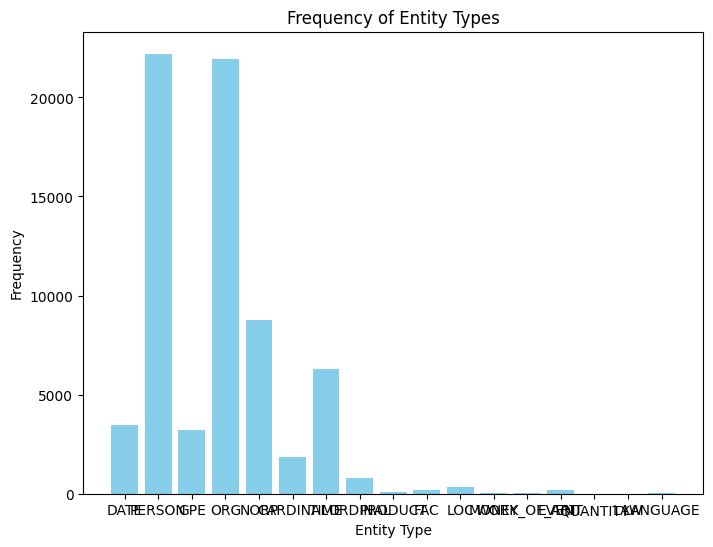

In [ ]:
import spacy
import matplotlib.pyplot as plt

# Load pre-trained model from spaCy
nlp = spacy.load('en_core_web_sm')

# Example text
texts = ufcdata['text']

# Initialize a dictionary to store entity counts
entity_counts = {}

# Process text with the NER model and count entity types
for text in texts:
    doc = nlp(text)

    # Extract entities and count occurrences of each entity type
    for ent in doc.ents:
        entity_counts[ent.label_] = entity_counts.get(ent.label_, 0) + 1

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(entity_counts.keys(), entity_counts.values(), color='skyblue')
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.title('Frequency of Entity Types')
plt.show()


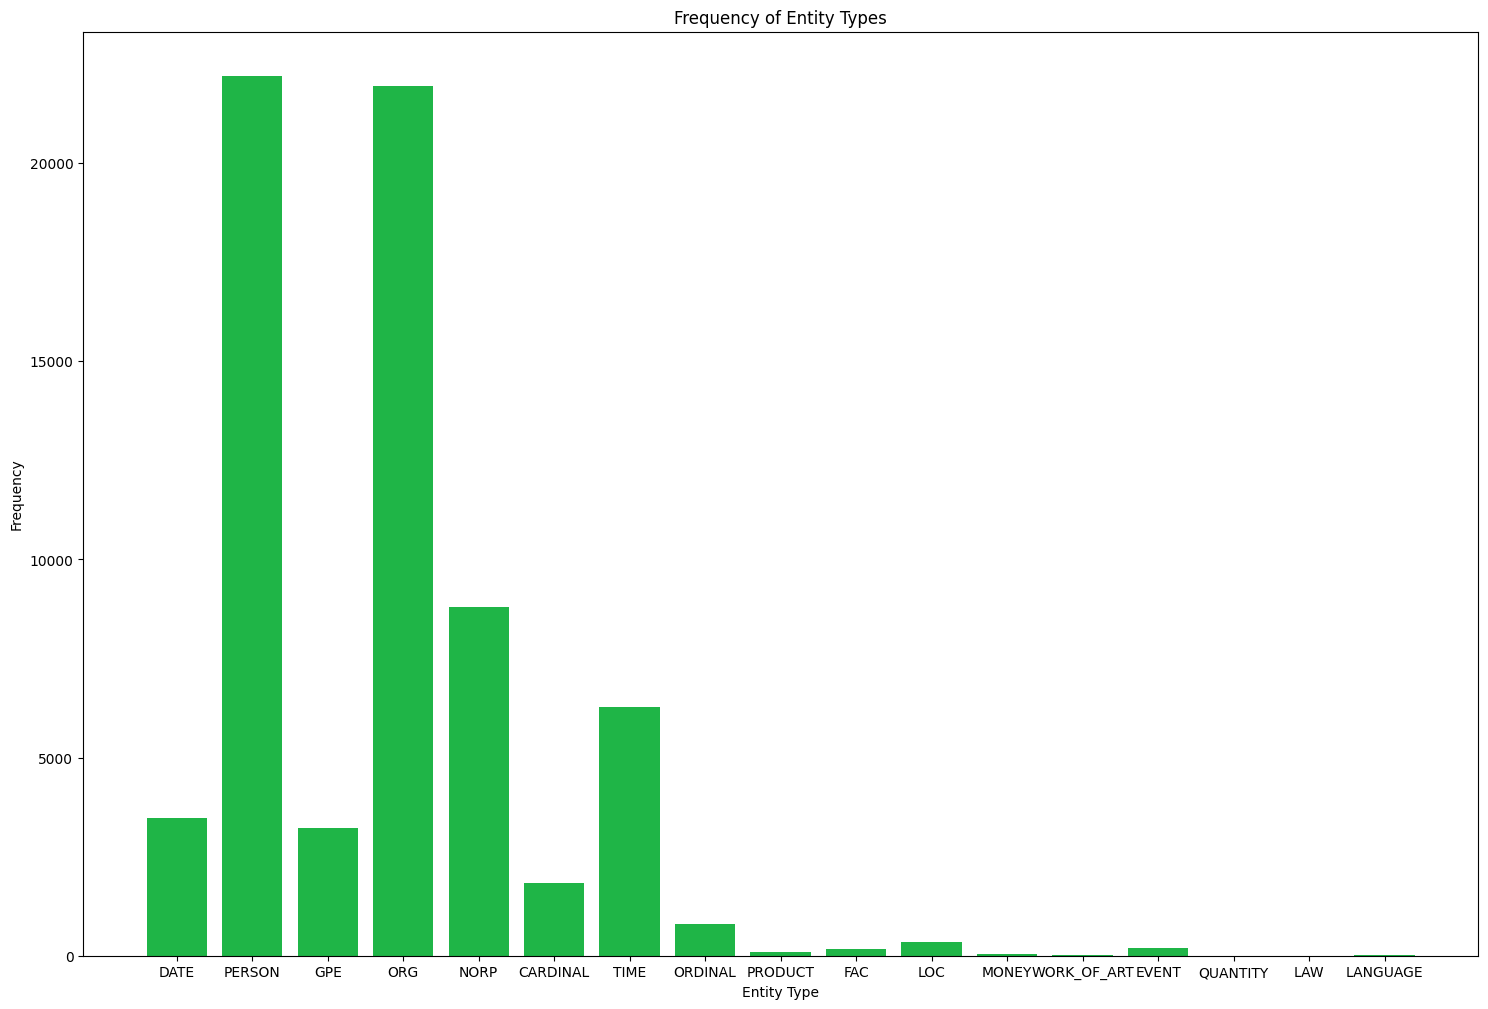

In [ ]:
# Plot the bar chart
plt.figure(figsize=(18, 12))
plt.bar(entity_counts.keys(), entity_counts.values(), color='#1fb547')
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.title('Frequency of Entity Types')
plt.show()


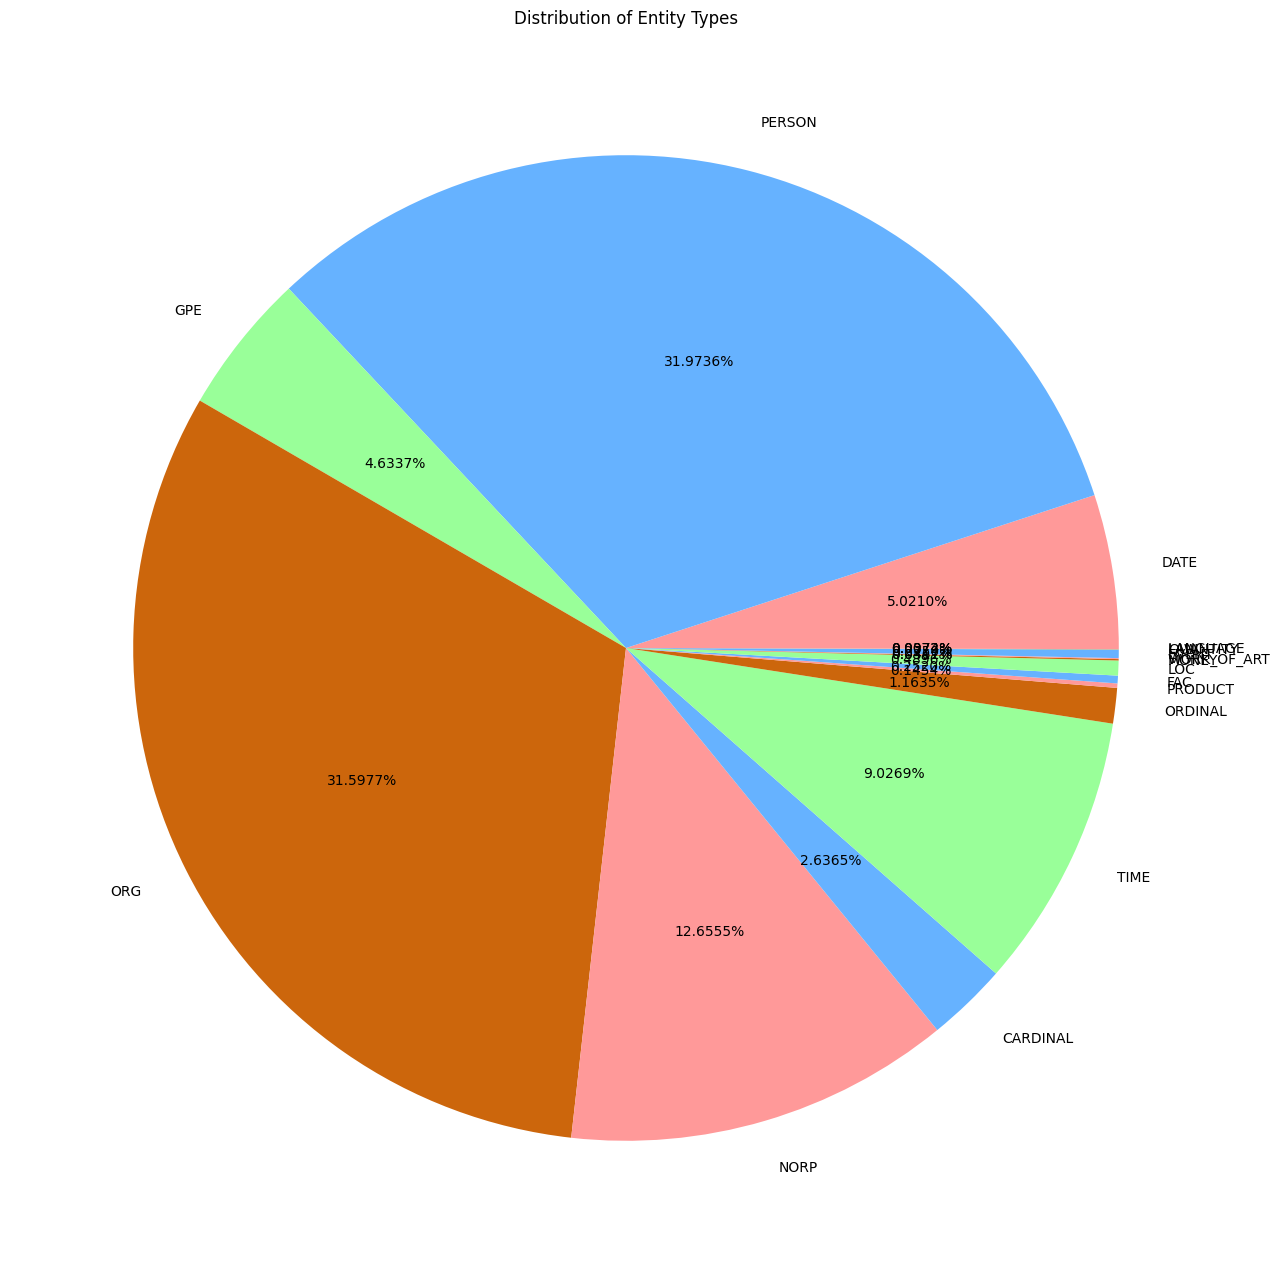

In [ ]:
# Plot the pie chart
plt.figure(figsize=(16, 16))
plt.pie(entity_counts.values(), labels=entity_counts.keys(), autopct='%1.4f%%', colors=['#FF9999', '#66B2FF', '#99FF99','#cc660c'])
plt.title('Distribution of Entity Types')
plt.show()



---


## **Sentiment Analysis**


---



In [22]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns


In [24]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


In [25]:
# Function to analyze sentiment
def analyze_sentiment(text):
    return analyzer.polarity_scores(text)


In [38]:
# Apply sentiment analysis to the 'text' column
ufcdata['sentiment'] = ufcdata['text'].apply(analyze_sentiment)


In [45]:
ufcdata.head(3)

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,...,hashtags,language,neg,neu,pos,compound,neg,neu,pos,compound
0,0,2359791506,TheJivemaster,Freelance Sports Journo\n\nHost @HindfightMMA ...,"Dublin City, Ireland",1626,2043,25156,2014-02-24 17:10:40,2021-01-21 20:09:40,...,[],en,0.000,0.915,0.085,0.3987,0.000,0.915,0.085,0.3987
1,1,1263156210867548161,DiamondSeason21,Dustin Poirier will defeat Conor McGregor,NaN,642,387,7773,2020-05-20 17:15:08,2021-01-21 20:10:32,...,[],en,0.117,0.793,0.090,-0.1906,0.117,0.793,0.090,-0.1906
2,2,1184533880453382145,iron_vick,It is a know fact that Dustin Poirier smells o...,Ireland,746,490,3393,2019-10-16 18:17:47,2021-01-21 20:10:58,...,"[{'text': 'UFC', 'indices': [110, 114]}, {'tex...",en,0.133,0.867,0.000,-0.3818,0.133,0.867,0.000,-0.3818


In [41]:
# Split the sentiment scores into separate columns for easier analysis
ufcdata = pd.concat([ufcdata.drop(['sentiment'], axis=1), ufcdata['sentiment'].apply(pd.Series)], axis=1)

print(ufcdata)


       Unnamed: 0               userid         username  \
0               0           2359791506    TheJivemaster   
1               1  1263156210867548161  DiamondSeason21   
2               2  1184533880453382145        iron_vick   
3               3  1262462359764860929     HammerCoufal   
4               4            560873469        waylenlee   
...           ...                  ...              ...   
40814       40814            303115040     Adrian_Forde   
40815       40815             44316192    FOXSportsAsia   
40816       40816  1105373042673238016   fightfitkamata   
40817       40817  1103861754562412544        Snig__dha   
40818       40818  1353067676722110466   fanfanfan13666   

                                                acctdesc  \
0      Freelance Sports Journo\n\nHost @HindfightMMA ...   
1              Dustin Poirier will defeat Conor McGregor   
2      It is a know fact that Dustin Poirier smells o...   
3                                                  

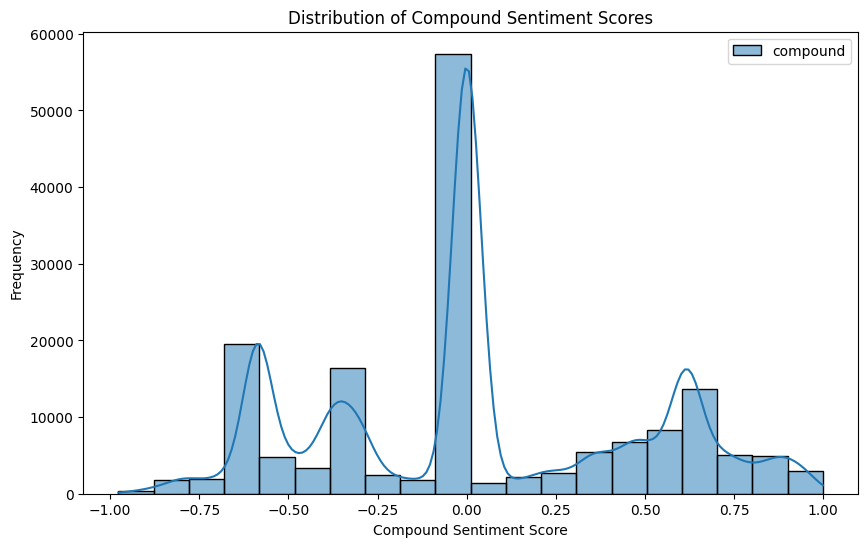

In [49]:
# Example visualization of sentiment scores
plt.figure(figsize=(10, 6))

# Plot compound sentiment score distribution
sns.histplot(ufcdata['compound'], bins=20, kde=True)
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compound Sentiment Scores')
plt.show()

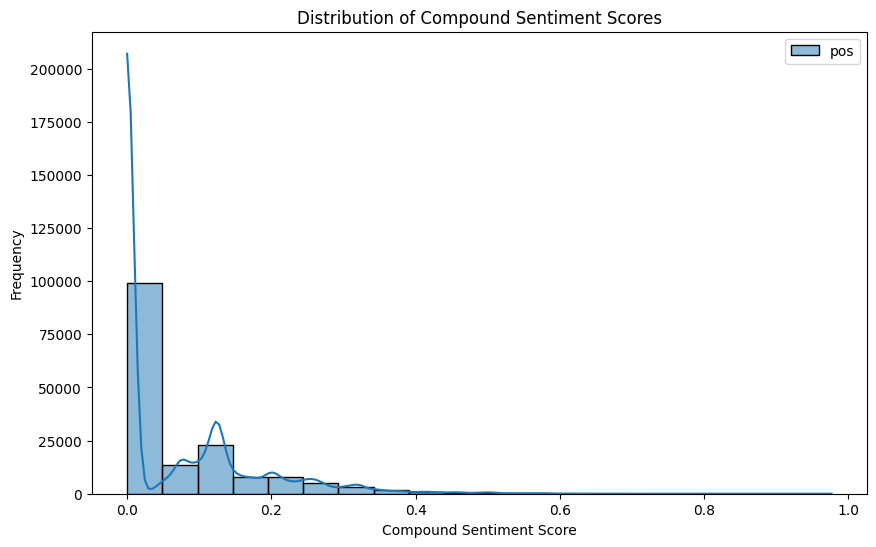

In [57]:
# Example visualization of sentiment scores
plt.figure(figsize=(10, 6))

# Plot compound sentiment score distribution
sns.histplot(ufcdata['pos'], bins=20, kde=True, color='#4b53bc')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compound Sentiment Scores')
plt.show()

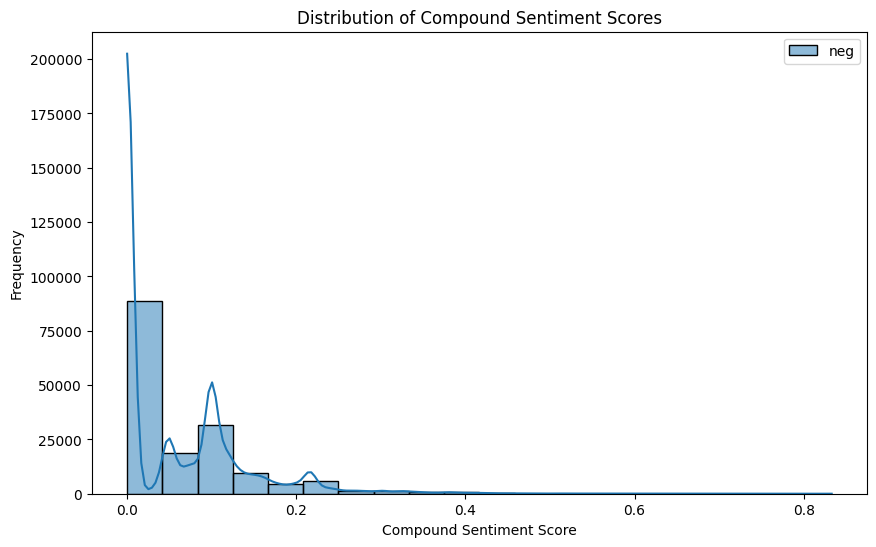

In [52]:
# Example visualization of sentiment scores
plt.figure(figsize=(10, 6))

# Plot compound sentiment score distribution
sns.histplot(ufcdata['neg'], bins=20, kde=True)
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compound Sentiment Scores')
plt.show()

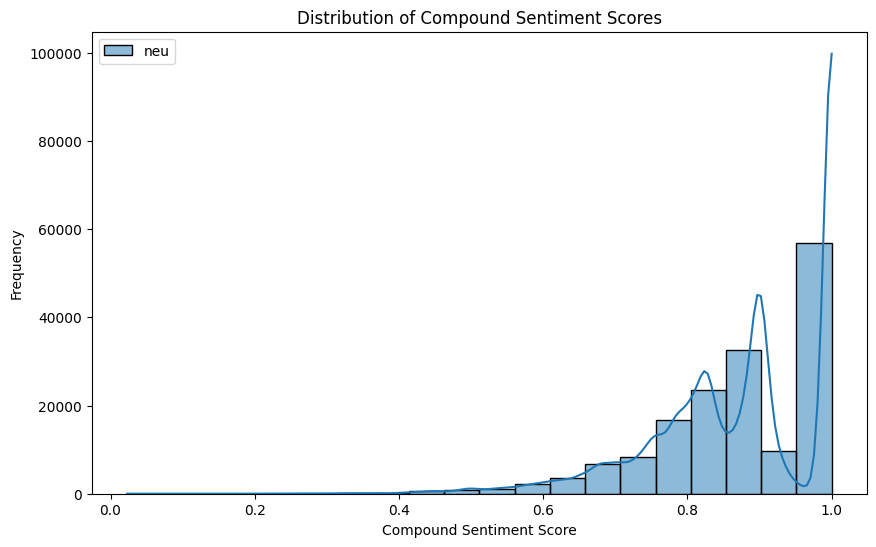

In [53]:
# Example visualization of sentiment scores
plt.figure(figsize=(10, 6))

# Plot compound sentiment score distribution
sns.histplot(ufcdata['neu'], bins=20, kde=True)
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compound Sentiment Scores')
plt.show()



---



---


***Hence thats the sentiment analysis of all +ive , -ive and Neutral tweets of UFC-257 Conor vs Dustin***


---



---

